# Module 5:  Boolean Indexing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Calculating boolean statistics

In [3]:
pd.options.display.max_columns = 50

In [4]:
# Reading te movie.csv data

movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# Subset movies dataset to include only the movies of greater than 2 hours duration
# This will only result in a boolean series shown below (not a dataFrame)

movie_2_hours = movie['duration'] > 120

print(type(movie_2_hours))

<class 'pandas.core.series.Series'>


In [6]:
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [7]:
# Find the total number of movies of duration > 2 hours

movie_2_hours.sum()

1039

In [8]:
# Find the proportion of movies of > 2 hours duration

movie_2_hours.mean()

0.2113506916192026

In [9]:
# Because the series is boolean (not numbers) .describe will produce counts etc, not mean std etc

movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [10]:
# Some movies have missing value for duration
# Dropping and recalculating the proportion --use drop.na() and gt() methods

movie['duration'].dropna().gt(120).mean()

0.21199755152009794

### Counting unique values in a series (finding their proportions)

In [11]:
# Finding  proportion of movies of duration > 2 hrs as well as that of others 
# Need to use Series.value_count with normalize=True option (which returns proportions instead of counts)

movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

### Comparing two columns and generating a boolean series as a result

In [12]:
# generate boolean series by condition actor_1_facebook_likes > actor_2_facebook_likes
# calculate the proportions of T and F
# First drop missing values

actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

# Constructing multiple boolean conditions

In [13]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
# specifying multiple boolean conditions

criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010)

# lets look at criteria2: content rating is PG
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [15]:
# Requiring all criterion to hold simultaneously ( combining with AND) 

criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

#### In Pandas, the bitwise operators (&, |, ~) have precedence over comparison operators (<,>, =).
#### The comparison operators, in turn, have precedence over *and, or, not*

In [16]:
# In the condition below, the first comparison involve the bitwise operator |
# Specifically, the first condition evaluated will be 2000 | movie.title_year, which is non-sensical. Hence the error

movie.title_year < 2000 | movie.title_year > 2009

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

# Filtering with boolean indexing

In [19]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

# defining first criterion
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [20]:
# defining second criterion

crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [21]:
# defining final criterion
# & looking at the resulting series of booleans 

final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [22]:
# Passing the final criterion to indexing operator of teh dataFrame to make the selection

movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,Bradley Cooper,682155,32438,Djimon Hounsou,3.0,bounty hunter|outer space|raccoon|talking anim...,http://www.imdb.com/title/tt2015381/?ref_=fn_t...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,Matthew McConaughey,928227,31488,Mackenzie Foy,1.0,black hole|father daughter relationship|saving...,http://www.imdb.com/title/tt0816692/?ref_=fn_t...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [21]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


# CASE STUDY: Gaining perspective on stock prices

In [24]:
# read Schlumberger stock price data

slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [25]:
# describe stock series disrtribution, esp include 10th and 90th percentiles

slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [30]:
# defining criteria (being outside the normal trading range)
# Note: slb_summary is a series with and index ('count', 'mean', 'std' etc)
# We can subset any required statistic by passing index label to .loc indexer

upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)

slb_top_bottom_10 = slb_close[criteria]




print('NORMAL TRADING RANGE FOR STOCK (lower_10- upper_10) is from 64.9 to 93.2')
print('The figures displayed are all out of normal trading range')
slb_top_bottom_10

NORMAL TRADING RANGE FOR STOCK (lower_10- upper_10) is from 64.9 to 93.2
The figures displayed are all out of normal trading range


Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
2010-02-08    62.12
2010-02-09    63.76
2010-02-10    63.65
2010-02-11    64.76
2010-02-12    64.30
2010-02-19    63.90
2010-02-22    61.57
2010-02-23    60.88
2010-02-24    60.91
2010-02-25    60.81
2010-02-26    61.10
2010-03-01    61.42
2010-03-02    62.81
2010-03-03    63.23
2010-03-04    62.88
2010-03-05    63.81
2010-03-08    64.48
2010-03-09    64.10
2010-03-10    64.20
2010-03-11    63.90
2010-03-12    64.54
2010-03-15    64.31
2010-03-19    64.32
2010-03-22    63.49
2010-03-23    63.03
              ...  
2014-10-30    97.62
2014-10-31    98.66
2014-11-03    96.52
2014-11-04    94.16
2014-11-05    96.64
2014-11-06    96.98
2014-11-07    98.73
2014-11-10    98.29
2014-11-11    98.36
2014-11-12    97.43
2014-11-13    94.85
2014-11-14    95.32
2014-11-17    95.63
2014-11-18    95.28
2014-11-19    95.00
2014-11-20    96.14
2014-11-21    97.87
2014-11-24    98.45
2014-11-25    9

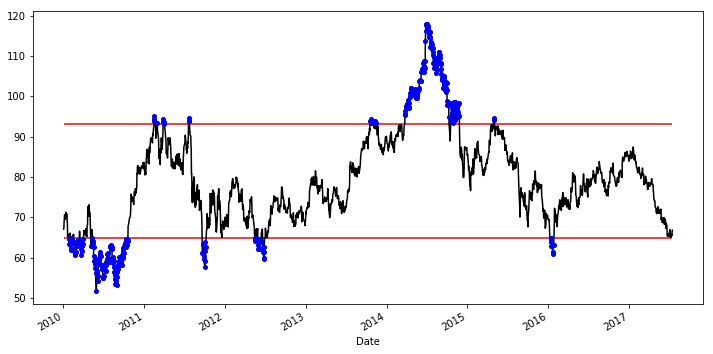

In [31]:
# creating plot
slb_close.plot(color='black', figsize=(12,6))


# Changing color to blue when outside range (top_bottom_10 criterion met)
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='blue')

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='red')

## More fine tuning of the graph is possible -- fill up area under curve in two colors

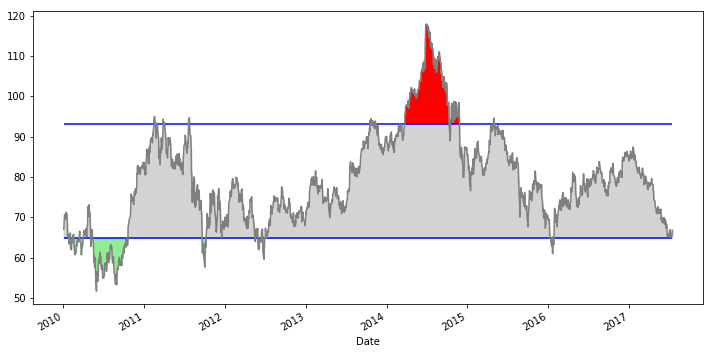

In [32]:
slb_close.plot(color='grey', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], 
           xmin=xmin, xmax=xmax,color='blue')


plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='lightgrey')

plt.fill_between(x=criteria.index,y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10,
                 color='lightgreen')
plt.fill_between(x=criteria.index, y1=upper_10, 
                 y2=slb_close.values, where=slb_close > upper_10,
                 color='red')

# CASE STUDY: Employee Data - applying various selection criteria

In [37]:
employee = pd.read_csv('data/employee.csv')
employee.columns

Index(['UNIQUE_ID', 'POSITION_TITLE', 'DEPARTMENT', 'BASE_SALARY', 'RACE',
       'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS', 'HIRE_DATE',
       'JOB_DATE'],
      dtype='object')

In [46]:
employee.DEPARTMENT.value_counts().head(10)

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Fleet Management Department        36
Library                            36
Admn. & Regulatory Affairs         29
Name: DEPARTMENT, dtype: int64

In [39]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [40]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

# # Your Turn

In [41]:
depts = ['Houston Police Department-HPD', 
             'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & \
               (employee.BASE_SALARY <= 120000)

In [42]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [43]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


### Find employees not in top 5 (largest) departments and drawing salary between dollars 8,000 to 12,000

In [44]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [45]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


In [52]:
fulltm=employee['EMPLOYMENT_TYPE']
fulltm.value_counts()



Full Time            1954
Part Time              20
Temporary               9
HFD Deferred Term       9
Part Time 30            8
Name: EMPLOYMENT_TYPE, dtype: int64

# Determining the normality of stock market returns

In [ ]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

In [ ]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

In [ ]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [ ]:
mean = amzn_daily_return.mean()  
std = amzn_daily_return.std()

In [ ]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [ ]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

In [ ]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean() 
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

In [ ]:
slb = pd.read_csv('data/slb_stock.csv', 
                  index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

# Improving readability of boolean indexing with the query method

In [ ]:
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [ ]:
qs = "DEPARTMENT in @depts " \
         "and GENDER == 'Female' " \
         "and 80000 <= BASE_SALARY <= 120000"
        
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

# There's more...

In [ ]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2[['DEPARTMENT', 'GENDER']].head()

# Preserving Series with the where method

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

In [ ]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

In [ ]:
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9])

In [ ]:
fb_likes.hist()

In [ ]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

In [ ]:
fb_likes.where(criteria_high).head()

In [ ]:
fb_likes.where(criteria_high, other=20000).head()

In [ ]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000)\
                       .where(criteria_low, 300)
fb_likes_cap.head()

In [ ]:
len(fb_likes), len(fb_likes_cap)

In [ ]:
fb_likes_cap.hist()

In [ ]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

# Masking DataFrame rows

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [ ]:
movie.mask(criteria).head()

In [ ]:
movie_mask = movie.mask(criteria).dropna(how='all')
movie_mask.head()

In [ ]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_boolean.head()

In [ ]:
movie_mask.equals(movie_boolean)

In [ ]:
movie_mask.shape == movie_boolean.shape

In [ ]:
movie_mask.dtypes == movie_boolean.dtypes

In [ ]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)

In [ ]:
%timeit movie.mask(criteria).dropna(how='all')

In [ ]:
%timeit movie[movie['title_year'] < 2010]

# Selecting with booleans, integer location and labels

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [ ]:
movie_loc = movie.loc[criteria]
movie_loc.head()

In [ ]:
movie_loc.equals(movie[criteria])

In [ ]:
movie_iloc = movie.iloc[criteria]

In [ ]:
movie_iloc = movie.iloc[criteria.values]

In [ ]:
movie_iloc.equals(movie_loc)

In [ ]:
movie.loc[criteria.values]

In [ ]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

In [ ]:
movie.loc[:, criteria_col].head()

In [ ]:
movie.iloc[:, criteria_col.values].head()

In [ ]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

In [ ]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

In [ ]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

## How it works

In [ ]:
a = criteria.values
a[:5]

In [ ]:
len(a), len(criteria)

# There's more...

In [ ]:
movie.loc[[True, False, True], [True, False, False, True]]